# 读取数据

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA数据探索

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

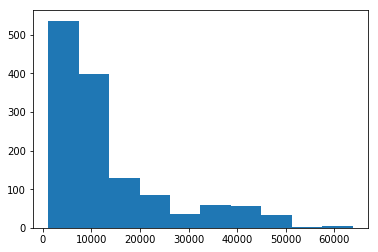

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(data['charges'])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <a list of 10 Patch objects>)

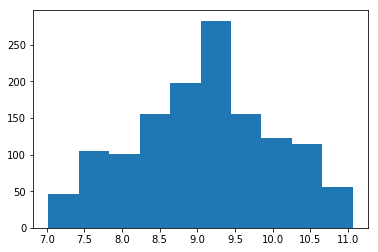

In [3]:
plt.hist(np.log(data['charges']))

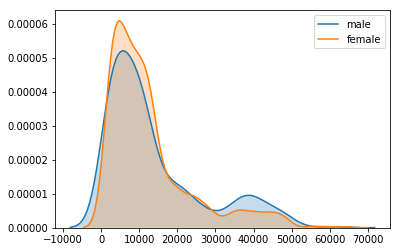

In [4]:
import seaborn as sns
sns.kdeplot(data.loc[data.sex=='male', 'charges'], shade=True, label='male')
sns.kdeplot(data.loc[data.sex=='female', 'charges'], shade=True, label='female')

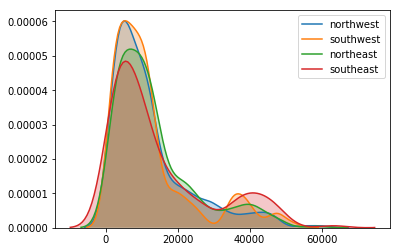

In [5]:
sns.kdeplot(data.loc[data.region=='northwest', 'charges'], shade=True, label='northwest')
sns.kdeplot(data.loc[data.region=='southwest', 'charges'], shade=True, label='southwest')
sns.kdeplot(data.loc[data.region=='northeast', 'charges'], shade=True, label='northeast')
sns.kdeplot(data.loc[data.region=='southeast', 'charges'], shade=True, label='southeast')

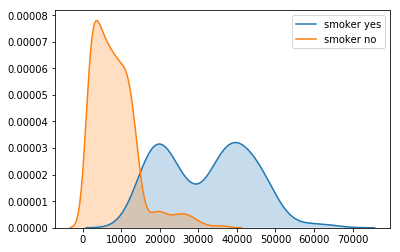

In [6]:
sns.kdeplot(data.loc[data.smoker=='yes', 'charges'], shade=True, label='smoker yes')
sns.kdeplot(data.loc[data.smoker=='no', 'charges'], shade=True, label='smoker no')

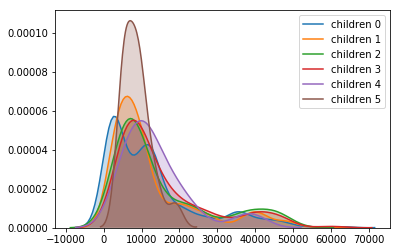

In [9]:
sns.kdeplot(data.loc[data.children==0, 'charges'], shade=True, label='children 0')
sns.kdeplot(data.loc[data.children==1, 'charges'], shade=True, label='children 1')
sns.kdeplot(data.loc[data.children==2, 'charges'], shade=True, label='children 2')
sns.kdeplot(data.loc[data.children==3, 'charges'], shade=True, label='children 3')
sns.kdeplot(data.loc[data.children==4, 'charges'], shade=True, label='children 4')
sns.kdeplot(data.loc[data.children==5, 'charges'], shade=True, label='children 5')

# 特征工程

In [10]:
data = data.drop(['region', 'sex'], axis=1)
data.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [13]:
def greater(df, bmi, num_child):
    df['bmi'] = 'over' if df['bmi'] >= bmi else 'under'
    df['children'] = 'no' if df['children'] == num_child else 'yes'
    return df

data = data.apply(greater, axis=1, args=(30, 0))
data.head()

,age,bmi,children,smoker,charges
0,19,under,no,yes,16884.92400
1,18,over,yes,no,1725.55230
2,28,over,yes,no,4449.46200
3,33,under,no,no,21984.47061
4,32,under,no,no,3866.85520


In [14]:
data = pd.get_dummies(data)
data.head()

,age,charges,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
0,19,16884.92400,0,1,1,0,0,1
1,18,1725.55230,1,0,0,1,1,0
2,28,4449.46200,1,0,0,1,1,0
3,33,21984.47061,0,1,1,0,1,0
4,32,3866.85520,0,1,1,0,1,0


In [15]:
x = data.drop('charges', axis=1)
y = data['charges']
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)
x.head()

,age,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
0,19,0,1,1,0,0,1
1,18,1,0,0,1,1,0
2,28,1,0,0,1,1,0
3,33,0,1,1,0,1,0
4,32,0,1,1,0,1,0


# 模型训练

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

reg = LinearRegression()

In [18]:
reg.fit(x_train_poly, np.log1p(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
ridge = Ridge()
ridge.fit(x_train_poly, np.log1p(y_train))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
booster = GradientBoostingRegressor()
booster.fit(x_train_poly, np.log1p(y_train))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

y_predict = reg.predict(x_test_poly)

In [25]:
y_predict_ridge = ridge.predict(x_test_poly)

In [29]:
y_predict_boost = booster.predict(x_test_poly)

# 模型评估

In [23]:
from sklearn.metrics import mean_squared_error
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=reg.predict(x_train_poly)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(reg.predict(x_train_poly))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(reg.predict(x_test_poly))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.38612871902910473,
 0.36726512388917415,
 4526.346164017067,
 4870.945538831188)

In [27]:
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=ridge.predict(x_train_poly)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict_ridge))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(ridge.predict(x_train_poly))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(ridge.predict(x_test_poly))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.3861483471673159, 0.3674145329917445, 4528.301421018692, 4874.6144518888195)

In [30]:
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=booster.predict(x_train_poly)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict_boost))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(booster.predict(x_train_poly))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(booster.predict(x_test_poly))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.3600122862648176,
 0.36850333631417226,
 4194.3561232608345,
 4747.7079905705605)